In [2]:
import os
work_dir = "/content/TensorFlow-Tutorials/"
if os.getcwd() != work_dir:
  !git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git
os.chdir(work_dir)    
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from mnist import MNIST
import math

Cloning into 'TensorFlow-Tutorials'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 459 (delta 2), reused 6 (delta 2), pack-reused 450
Receiving objects: 100% (459/459), 62.79 MiB | 32.39 MiB/s, done.
Resolving deltas: 100% (212/212), done.


In [3]:
data = MNIST(data_dir = "/data/MNIST")

- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!
- Download progress: 100.0% Done!


In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, InputLayer
from tensorflow.python.keras.layers import MaxPooling2D, Reshape
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense, Dropout

In [29]:
print("Size of: ")
print("- Training Set: {0} \t\t".format(data.num_train))
print("- Test Set: {0} \t\t".format(data.num_test))
print("- Validation Set: {0} \t".format(data.num_val))

Size of: 
- Training Set: 55000 		
- Test Set: 10000 		
- Validation Set: 5000 	


In [0]:
img_size = data.img_size
img_size_flat = data.img_size_flat
img_shape = data.img_shape
img_shape_full = data.img_shape_full
num_classes = data.num_classes
num_channels = data.num_channels

In [0]:
def plot_images(images, cls_true, cls_pred = None):
  assert len(images) == len(cls_true) == 9
  fig, axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
    if cls_pred is None:
      xlabel = "True: {0}".format(cls_true[i])
    else:
      xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
  plt.show()

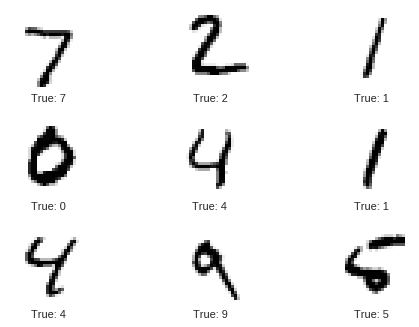

In [32]:
images = data.x_test[0:9]
cls_true = data.y_test_cls[0:9]
plot_images(images = images, cls_true = cls_true)

In [0]:
def plot_wrong_examples(cls_pred):
  incorrect = (cls_pred != data.y_test_cls)
  images = data.x_test[incorrect]
  cls_true = data.y_test_cls[incorrect]
  cls_pred = cls_pred[incorrect]
  plot_images(images = images[0:9], cls_true = cls_true[0:9], cls_pred = cls_pred[0:9])

In [0]:
model = Sequential()
model.add(InputLayer(input_shape = (img_size_flat,)))
model.add(Reshape(img_shape_full))
model.add(Conv2D(kernel_size = 5, strides = 1, filters = 16, padding = 'SAME', activation = 'relu', name = 'conv_layer1'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(kernel_size = 5, strides = 1, filters = 36, padding = 'SAME', activation = 'relu', name = 'conv_layer2'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.9))
model.add(Dense(10, activation = 'softmax'))         

In [0]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr = 0.001)

In [0]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.fit(x = data.x_train, y = data.y_train, epochs = 1, batch_size = 128)

Epoch 1/1
55000/55000 [==============================] - 77s 1ms/step - loss: 1.0398 - acc: 0.6016


In [44]:
result = model.evaluate(x = data.x_test, y = data.y_test)

10000/10000 [==============================] - 6s 615us/step


In [45]:
for name, value in zip(model.metrics_names, result):
  print(name, value)
#print({0}: {1: .2%}.format(model_metrics_names[1], result[1]))  

loss 0.11492919553890825
acc 0.9692


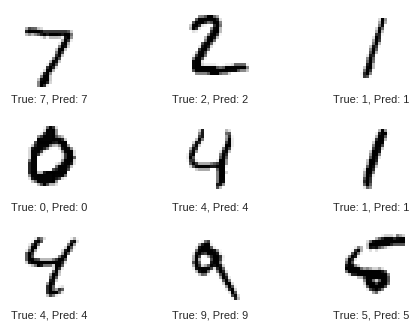

In [16]:
images = data.x_test[0:9]
cls_true = data.y_test_cls[0:9]
y_pred = model.predict(x = images)
cls_pred = np.argmax(y_pred, axis = 1)
plot_images(images, cls_true = cls_true, cls_pred = cls_pred)

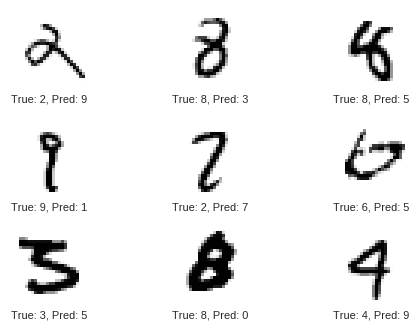

In [17]:
images = data.x_test
cls_true = data.y_test_cls
y_pred = model.predict(x = images)
cls_pred = np.argmax(y_pred, axis = 1)
plot_wrong_examples(cls_pred)

In [0]:
# #Functional Keras Model
inputs = Input(shape = (img_size_flat,))
net = inputs
net = Reshape(img_shape_full)(net)
net = Conv2D(kernel_size = 5, strides = 1, filters = 16, padding = 'same', activation = 'relu', name = 'conv_layer1')(net)
net = MaxPooling2D(pool_size = 2, strides = 2)(net)
net = Conv2D(kernel_size = 5, strides = 1, filters = 36, padding = 'same', activation = 'relu', name = 'conv_layer2')(net)
net = MaxPooling2D(pool_size = 2, strides = 2)(net)
net = Flatten()(net)
net = Dense(128, activation = 'relu')(net)
net = Dense(num_classes, activation = 'softmax')(net)
outputs = net

In [0]:
from tensorflow.python.keras.models import Model
model2 = Model(inputs = inputs, outputs = outputs)
model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
model2.fit(x = data.x_train, y = data.y_train, epochs = 1, batch_size = 128)

Epoch 1/1
55000/55000 [==============================] - 78s 1ms/step - loss: 0.2092 - acc: 0.9361


In [21]:
result = model2.evaluate(x = data.x_test, y = data.y_test)

10000/10000 [==============================] - 6s 621us/step


In [23]:
for name, value in zip(model2.metrics_names, result):
  print(name, value)

loss 0.07040035724705085
acc 0.9753


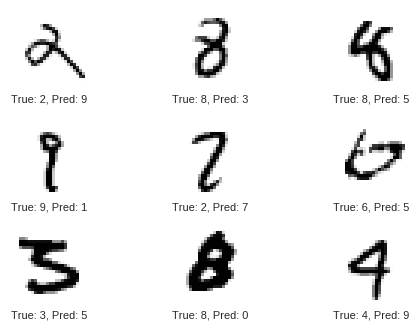

In [25]:
y_pred = model2.predict(x = data.x_test)
cls__pred = np.argmax(y_pred, axis = 1)
plot_wrong_examples(cls_pred)